## Tutorial: Image Segmentation

In this tutorial, we will recall the following popular bottom-up image segmentation methods:
1. Felzenszwalb
2. SLIC - K-Means based image segmentation
3. Quickshift 

Note that in real images, it is difficult to obtain a good segmentation, and the definition of "good" often depends on the application. Hence, these methods can be used for obtaining
an oversegmentation, also known as superpixels. These superpixels then serve as
a basis for more sophisticated algorithms such as conditional random fields
(CRF).

Source: [scikit-image docs](https://scikit-image.org/docs/dev/api/skimage.segmentation.html?highlight=slic#skimage.segmentation.slic)






In [1]:
%matplotlib inline

In [2]:
# imports we will need in the notebook:
import matplotlib.pyplot as plt
import numpy as np
from skimage.util import img_as_float
from skimage.color import rgb2gray
from skimage.filters import sobel
from skimage.segmentation import felzenszwalb, slic, quickshift
from skimage.segmentation import mark_boundaries

In [3]:
# Auxiliar function
def visualize4(original, segmentation0, segmentation1, segmentation2, segmentation3,label1,label2,label3,label4):
    #visualize
    fig=plt.figure(figsize=(20,15))
    
    fig.add_subplot(1,4,1)
    plt.title(label1)
    plt.imshow(mark_boundaries(original, segmentation0)) 
    plt.xticks([])
    plt.yticks([])
    
    fig.add_subplot(1,4,2)
    plt.title(label2)
    plt.imshow(mark_boundaries(original, segmentation1)) 
    plt.xticks([])
    plt.yticks([])
    
    fig.add_subplot(1,4,3)
    plt.xticks([])
    plt.yticks([])
    plt.title(label3)
    plt.imshow(mark_boundaries(original, segmentation2)) 
    
    fig.add_subplot(1,4,4)
    plt.xticks([])
    plt.yticks([])
    plt.title(label4)
    plt.imshow(mark_boundaries(original, segmentation3)) 

Load 'Lenna' image from images folder. You can also use another image.

Image dimensions are:  (512, 512, 3)
Image dtype is:  float64
Image max value is:  1.0


Text(0.5, 1.0, 'Lena')

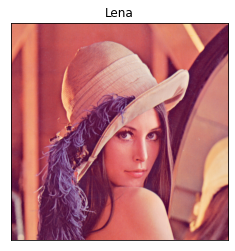

In [4]:
from skimage import io

img = io.imread('images/Lenna.png')
img = img_as_float(img)

print('Image dimensions are: ', img.shape)
print('Image dtype is: ',  img.dtype)
print('Image max value is: ',  img.max())

plt.imshow(img)
plt.xticks([])
plt.yticks([])
plt.title('Lena')


## [Felzenszwalb's efficient graph based segmentation](https://scikit-image.org/docs/dev/api/skimage.segmentation.html?highlight=slic#skimage.segmentation.felzenszwalb)
This fast 2D image segmentation algorithm, proposed in [1] is popular in the
computer vision community.
Check your theory slides to remind what it is about.

The algorithm has a single ``scale`` parameter related to the ``tau`` parameter that influences the segment size. 
Remind what the ``tau`` parameter is doing in the algorithm!
The parameter ``scale`` sets an observation level. Higher scale means less and larger segments.

``sigma`` is the diameter of a Gaussian kernel, used for smoothing the image prior to segmentation.

The number of produced segments as well as their size can only be controlled indirectly through scale and the``min_size`` parameter. Segment size within an image can vary greatly depending on local contrast. The actual size and number of segments can vary greatly, depending on local contrast.



For RGB images, the algorithm uses the euclidean distance between pixels in color space.

[1] Efficient graph-based image segmentation, Felzenszwalb, P.F. and
       Huttenlocher, D.P.  International Journal of Computer Vision, 2004



(512, 512)
Felzenszwalb number of segments: 387


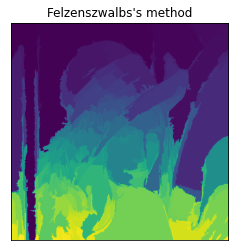

In [5]:
segments_fz = felzenszwalb(img, scale=100, sigma=0.5, min_size=50)

print(segments_fz.shape)
print(f"Felzenszwalb number of segments: {len(np.unique(segments_fz))}")

plt.imshow(segments_fz) 
plt.title("Felzenszwalbs's method")
plt.xticks([])
plt.yticks([])
plt.show()

To overlap the image and its detected contours, we can use the command mark_boundaries()

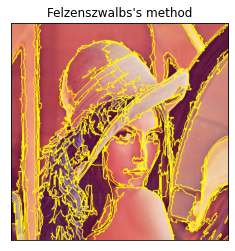

In [6]:
plt.imshow(mark_boundaries(img, segments_fz)) 
plt.title("Felzenszwalbs's method")
plt.xticks([])
plt.yticks([])
plt.show()

Let's change the ``scale``, ``sigma``, and ``min_size``parameter value:

Felzenszwalb number of segments: 387
Felzenszwalb number of segments: 72
Felzenszwalb number of segments: 137
Felzenszwalb number of segments: 70


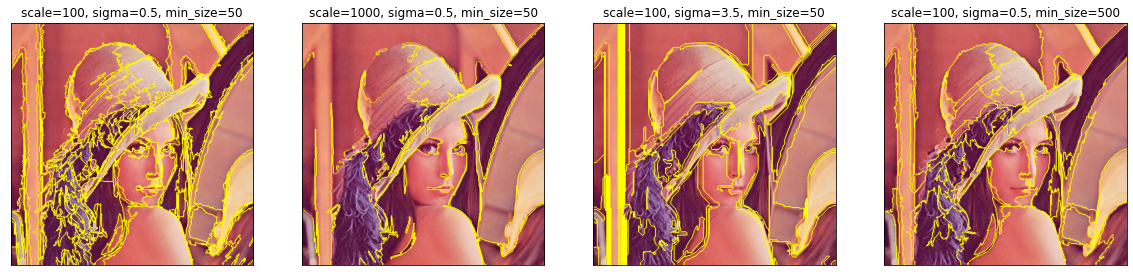

In [7]:
segments_fz_0 = felzenszwalb(img, scale=100, sigma=0.5, min_size=50)
print(f"Felzenszwalb number of segments: {len(np.unique(segments_fz_0))}")

segments_fz_1 = felzenszwalb(img, scale=1000, sigma=0.5, min_size=50)
print(f"Felzenszwalb number of segments: {len(np.unique(segments_fz_1))}")

segments_fz_2 = felzenszwalb(img, scale=100, sigma=3.5, min_size=50)
print(f"Felzenszwalb number of segments: {len(np.unique(segments_fz_2))}")

segments_fz_3 = felzenszwalb(img, scale=100, sigma=0.5, min_size=500)
print(f"Felzenszwalb number of segments: {len(np.unique(segments_fz_3))}")

visualize4(img, segments_fz_0, segments_fz_1, segments_fz_2, segments_fz_3,\
          'scale=100, sigma=0.5, min_size=50',
          'scale=1000, sigma=0.5, min_size=50',
          'scale=100, sigma=3.5, min_size=50',
          'scale=100, sigma=0.5, min_size=500')

**Exercise:** Analyze and comment the effect of the parameter change in the previous results.

## [SLIC - K-Means based image segmentation](https://scikit-image.org/docs/dev/api/skimage.segmentation.html?highlight=slic#skimage.segmentation.slic)

Simple linear iterative clustering (SLIC) algorithm performs K-means in the 5d space of color information and spatial information (image location). As the
clustering method is simpler, it is very efficient. It is essential for this
algorithm to work in color space to obtain good results.  The algorithm
is widely used. See [3] for details. 

The ``n_segments`` parameter chooses the number of centers for kmeans, while the ``compactness`` parameter trades off color-similarity and proximity that is determines the ratio between spatial and color parameters ratio. ``sigma`` determines smoothing of the image before processing.

[3] Radhakrishna Achanta, Appu Shaji, Kevin Smith, Aurelien Lucchi,
    Pascal Fua, and Sabine Suesstrunk, SLIC Superpixels Compared to
    State-of-the-art Superpixel Methods, TPAMI, May 2012.


Check the parameters by default.

<ipython-input-8-b5f4ee6110a6>:1: FutureWarning: skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.
  segments_slic = slic(img)


SLIC number of segments: 74


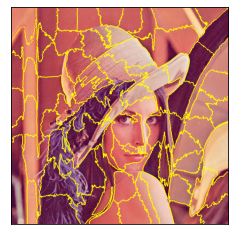

In [8]:
segments_slic = slic(img)

print(f"SLIC number of segments: {len(np.unique(segments_slic))}")

plt.imshow(mark_boundaries(img, segments_slic))
plt.xticks([])
plt.yticks([])
plt.show()

<ipython-input-9-6eb643385b82>:1: FutureWarning: skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.
  segments_slic_0 = slic(img, n_segments=100, compactness=10, sigma=1)


SLIC number of segments: 75


<ipython-input-9-6eb643385b82>:4: FutureWarning: skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.
  segments_slic_1 = slic(img, n_segments=500, compactness=10, sigma=1)


SLIC number of segments: 405


<ipython-input-9-6eb643385b82>:7: FutureWarning: skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.
  segments_slic_2 = slic(img, n_segments=100, compactness=20, sigma=1)


SLIC number of segments: 92


<ipython-input-9-6eb643385b82>:10: FutureWarning: skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.
  segments_slic_3 = slic(img, n_segments=100, compactness=10, sigma=5)


SLIC number of segments: 85


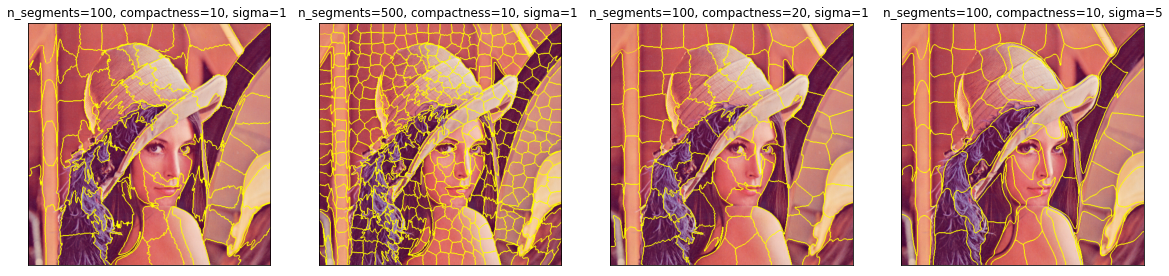

In [9]:
segments_slic_0 = slic(img, n_segments=100, compactness=10, sigma=1)
print(f"SLIC number of segments: {len(np.unique(segments_slic_0))}")

segments_slic_1 = slic(img, n_segments=500, compactness=10, sigma=1)
print(f"SLIC number of segments: {len(np.unique(segments_slic_1))}")

segments_slic_2 = slic(img, n_segments=100, compactness=20, sigma=1)
print(f"SLIC number of segments: {len(np.unique(segments_slic_2))}")

segments_slic_3 = slic(img, n_segments=100, compactness=10, sigma=5)
print(f"SLIC number of segments: {len(np.unique(segments_slic_3))}")

visualize4(img, segments_slic_0, segments_slic_1, segments_slic_2, segments_slic_3,\
          'n_segments=100, compactness=10, sigma=1 ',
          'n_segments=500, compactness=10, sigma=1 ',
          'n_segments=100, compactness=20, sigma=1 ',
          'n_segments=100, compactness=10, sigma=5')

## [Quickshift image segmentation](https://scikit-image.org/docs/dev/api/skimage.segmentation.html#skimage.segmentation.quickshift)

Quickshift is a 2D image segmentation algorithm, based on an approximation of kernelized mean-shift.

What is the mean-shitf algorithm doing?

Thus, quickshift belongs to the family of local mode-seeking algorithms and is applied to the 5D space consisting of color information and spatial information (image location) [2].

One of the benefits of quickshift is that it actually computes a
hierarchical segmentation on multiple scales simultaneously.

Quickshift has two main parameters:  

The ``kernel_size`` or bandwidth corresponds to the width of Gaussian kernel used in smoothing the sample density. Higher means fewer clusters.

``max_dist`` selects a level in the hierarchical segmentation that is produced.

There is also a trade-off between distance in color-space and distance in image-space, given by ``ratio``. 

``sigma`` determines the width for Gaussian smoothing as preprocessing. Zero means no smoothing.,

[2] Quick shift and kernel methods for mode seeking, Vedaldi, A. and Soatto, S. European Conference on Computer Vision, 2008

Quickshift number of segments: 532


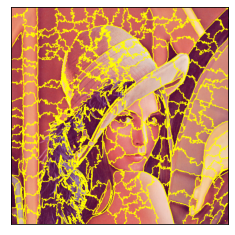

In [10]:
segments_quick = quickshift(img)

print(f"Quickshift number of segments: {len(np.unique(segments_quick))}")

plt.imshow(mark_boundaries(img, segments_quick))
plt.xticks([])
plt.yticks([])
plt.show()

Check the by default optional values.

Let's change the value of ``kernel_size``, ``ratio``, and ``max_dist``:

Quickshift number of segments: 326
Quickshift number of segments: 336
Quickshift number of segments: 83
Quickshift number of segments: 79


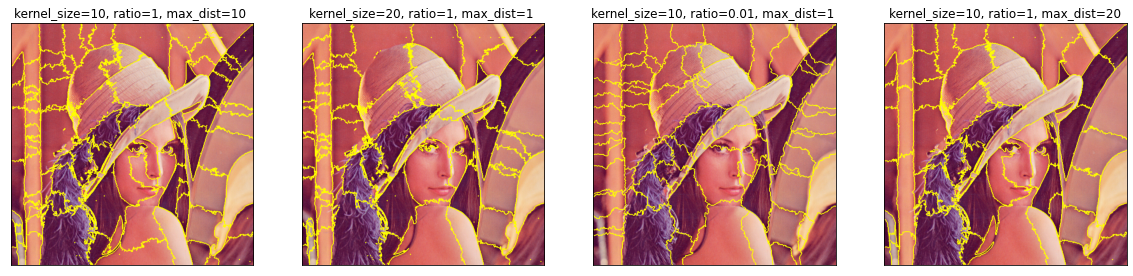

In [11]:
segments_quick_0 = quickshift(img, kernel_size=10, ratio=1, max_dist=10)
print(f"Quickshift number of segments: {len(np.unique(segments_quick_0))}")

segments_quick_1 = quickshift(img, kernel_size=15, ratio=1, max_dist=10)
print(f"Quickshift number of segments: {len(np.unique(segments_quick_1))}")

segments_quick_2 = quickshift(img, kernel_size=10, ratio=0.01, max_dist=10)
print(f"Quickshift number of segments: {len(np.unique(segments_quick_2))}")

segments_quick_3 = quickshift(img, kernel_size=10, ratio=1, max_dist=20)
print(f"Quickshift number of segments: {len(np.unique(segments_quick_3))}")

visualize4(img, segments_quick_0, segments_quick_1, segments_quick_2, segments_quick_3,
          'kernel_size=10, ratio=1, max_dist=10 ',
          'kernel_size=20, ratio=1, max_dist=1 ',
          'kernel_size=10, ratio=0.01, max_dist=1 ',
          'kernel_size=10, ratio=1, max_dist=20')

Note that the algorithm takes more time when increasing the value of the parameter kernel_size. This is due to the computation of the Parzen density estimate. The pixel density and its modes are estimated by using a Parzen window estimator with a Gaussian kernel of the specified size (kernel_size). The larger the size, the larger the neighborhoods of pixels considered.

Moreover, the values of the parameters are set depending on what you want to obtain, a final segmentation or an oversegmentation formed by superpixels which can serve as
a basis for other algorithms.

**Which are the parameters that give better contours up to you?**

**Exercise:** Analyze and comment the effect of the parameter changes in the previous results.

## [Comparison of segmentation algorithms](https://scikit-image.org/docs/dev/auto_examples/segmentation/plot_segmentations.html)


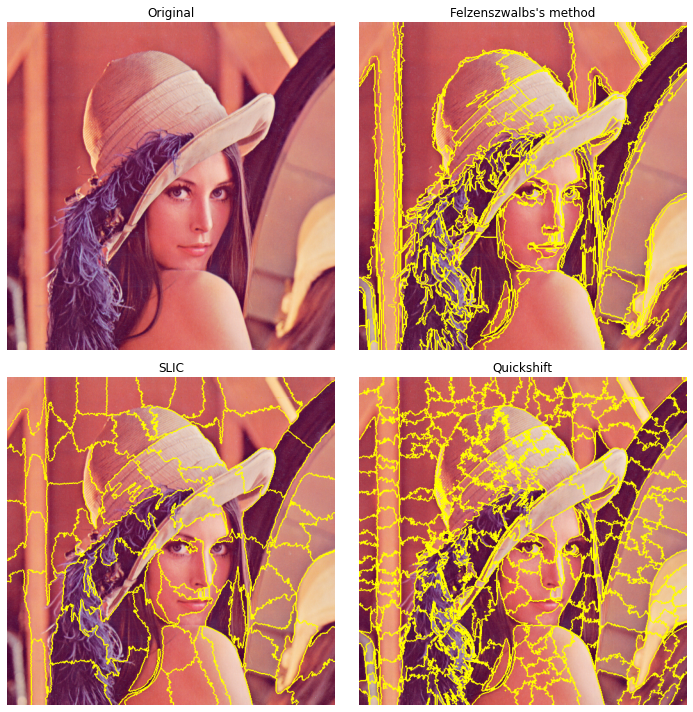

In [12]:
fig, ax = plt.subplots(2, 2, figsize=(10, 10), sharex=True, sharey=True)

ax[0, 0].imshow(img)
ax[0, 0].set_title("Original")

ax[0, 1].imshow(mark_boundaries(img, segments_fz))
ax[0, 1].set_title("Felzenszwalbs's method")

ax[1, 0].imshow(mark_boundaries(img, segments_slic))
ax[1, 0].set_title('SLIC')

ax[1, 1].imshow(mark_boundaries(img, segments_quick))
ax[1, 1].set_title('Quickshift')

for a in ax.ravel():
    a.set_axis_off()

plt.tight_layout()
plt.show()

**Exercise:** Analyze and comment the effect of the parameter change in the previous results.

**Exercise:** Analyze and comment the differences among the segmentation methods.

**Exercise**: Repeat the previous segmentation with another image.
